In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import ast
import numpy as np

In [2]:
cont1 = []
cont2 = []
cont3 = []

In [12]:
trackers_1 = []
trackers_2 = []
trackers_3 = []

In [47]:
exp_num = 6

In [48]:
df = pd.read_csv('sankey-helper-{}.csv'.format(exp_num), converters={'byhost':ast.literal_eval, 'byvname': ast.literal_eval})

In [49]:
df[:5]

,namevalue,context_id,time_stamp,byhost,byvname
0,"('131', '20200502')",1,6,{match.deepintent.com},"{theguardian, forbes}"
1,"('131', '20200502')",2,1,{.deepintent.com},{medscape}
2,"('A3', 'd=AQABBKPMrF4CEKCi8LpQuotbEk2A-M-xq1YF...",1,21,"{ups.analytics.yahoo, pr.ybp.yahoo, pr-bh.ybp....","{theguardian, cnn, nytimes, forbes}"
3,"('A3', 'd=AQABBKPMrF4CEKCi8LpQuotbEk2A-M-xq1YF...",2,44,"{ups.analytics.yahoo, ads.yahoo.com, pr-bh.ybp...","{verywellhealth, webmd, medscape}"
4,"('A3', 'd=AQABBKPMrF4CEKCi8LpQuotbEk2A-M-xq1YF...",3,12,"{sp.analytics.yahoo, .yahoo.com}",{colledgeboard}


In [50]:
keywords = """deepintent
yahoo
advertising
ib-ibi
mookie1
atdmt
casalemedia
exelator
bttrack
doubleclick
contextweb
nr-data
pubmatic
bing
adsrvr
tapad
adsymptotic
scorecardresearch
crwdcntrl
districtm
krxd
1rx
agkn
amazon-adsystem
adentifi
adnxs
spotxchange
rubiconproject
bidr
bluekai
dnacdn
bidswitch
myvisualiq
ipredictive
quantserve
media.net
demdex
everesttech
extend.tv
facebook
openx
mathtag
mxptint
twitter
rlcdn
rkdms
owneriq
sitescout
sharethrough
simpli
taboola
3lift
myvisualiq
turn.com
adform
w55c
zemanta
tribalfusion
linkedin
iasds01
dotomi
appier
acuityplatform
advangelists
mfadsrvr
zorosrv
smartadserver
rfihub
srv
creativecdn
addthis
gumgum
yieldmo"""
keywords = keywords.split("\n")

In [51]:
len(keywords)

73

In [52]:
unique_trackers = [set(), set(), set()]

In [53]:
for i in range(df.shape[0]):
    for keyword in keywords:
        for host in df.byhost[i]:
            if host.find(keyword) != -1:
                unique_trackers[df.context_id[i]-1].add(keyword)

In [54]:
trackers_1.append(",".join(unique_trackers[0]))
trackers_2.append(",".join(unique_trackers[1]))
trackers_3.append(",".join(unique_trackers[2]))

In [56]:
trackers_df = pd.DataFrame({'context1':trackers_1, 'context2:':trackers_2, 'context3:':trackers_3})

In [58]:
trackers_df.index += 1

In [60]:
trackers_df.to_csv('trackers_acorss_contexts_and_exps.csv')

In [72]:
cont1.append(len(unique_trackers[0]))
cont2.append(len(unique_trackers[1]))
cont3.append(len(unique_trackers[2]))

In [73]:
cont1

[57, 69, 40, 64, 55, 69]

In [74]:
cont2

[57, 68, 32, 62, 55, 68]

In [75]:
cont3

[7, 7, 11, 11, 11, 10]

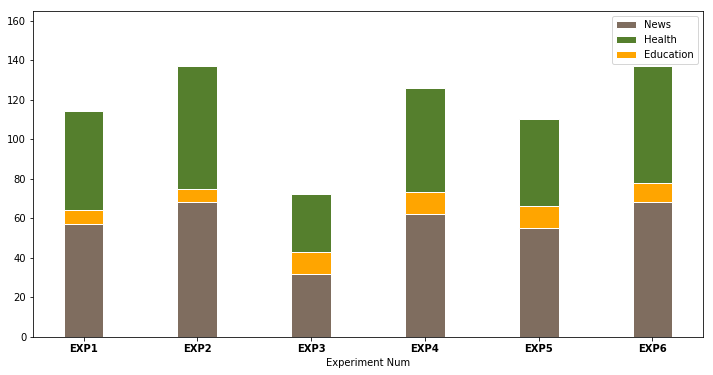

In [107]:
ind = np.arange(6) 
width = 0.35
fig, ax = plt.subplots(figsize=(12,6))
ax.bar(ind, cont1, width, color='#7f6d5f', edgecolor='white', label='News')
ax.bar(ind, cont2, width, bottom=cont1, color='#557f2d', edgecolor='white', label='Health')
ax.bar(ind, cont3, width, bottom=cont2, color='orange', edgecolor='white', label='Education')
names = ['EXP1','EXP2','EXP3','EXP4','EXP5','EXP6']
ax.set_ylim([0, 165])
ax.legend(loc="upper right")
plt.xticks(ind, names, fontweight='bold')
plt.xlabel("Experiment Num")
plt.show()